In [1]:
pip install progressbar

  Using cached progressbar-2.5.tar.gz (10 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12084 sha256=b8c46b94346b1791109b2dff42199cb26408a20919284234800d19a20bf88939
  Stored in directory: c:\users\dietd\appdata\local\pip\cache\wheels\8d\bb\b2\5353b966ac6f3c5e1000629a9a5f6aed41794487f551e32efc
Successfully built progressbar
Note: you may need to restart the kernel to use updated packages.


In [2]:
#https://github.com/omartinsky/HJM/blob/main/hjm.ipynb

from mpl_toolkits.mplot3d import Axes3D
import copy as copylib
from progressbar import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Slider
#%pylab
%matplotlib notebook
#pylab.rcParams['figure.figsize']=(16,4.5)
np.random.seed(0)

In [3]:
plt.rcParams.update({
    'text.usetex' : True,
    "font.family": "serif",
    "font.monospace": 'Computer Modern'
})

In [4]:
dataframe = pd.read_csv('hjm_data.csv').set_index('time')/100
pd.options.display.max_rows = 10
display(dataframe)

1/12       1/2         1       1.5         2       2.5         3  \
time                                                                         
1     0.057734  0.064382  0.067142  0.066512  0.064991  0.063255  0.061534   
2     0.057680  0.064506  0.067502  0.066842  0.065423  0.063852  0.062301   
3     0.057758  0.064410  0.067354  0.066845  0.065577  0.064109  0.062611   
4     0.057430  0.064103  0.066942  0.066215  0.064904  0.063462  0.062006   
5     0.057412  0.063978  0.066358  0.065502  0.064168  0.062722  0.061262   
...        ...       ...       ...       ...       ...       ...       ...   
1260  0.046421  0.045093  0.042471  0.042081  0.042663  0.043224  0.043640   
1261  0.046233  0.044976  0.042452  0.042131  0.042726  0.043285  0.043699   
1262  0.046348  0.045311  0.043295  0.043266  0.043963  0.044565  0.045003   
1263  0.046327  0.045347  0.043184  0.043144  0.043859  0.044482  0.044941   
1264  0.046138  0.045251  0.042916  0.042833  0.043498  0.044054  0.044440   

           3.5         4       4.5  ...      20.5        21      21.5  \
time                                ...                                 
1     0.059925  0.058444  0.057058  ...  0.034194  0.034772  0.035371   
2     0.060846  0.059490  0.058198  ...  0.033790  0.034437  0.035108   
3     0.061164  0.059782  0.058438  ...  0.032706  0.033294  0.033907   
4     0.060601  0.059252  0.057933  ...  0.031325  0.031891  0.032486   
5     0.059849  0.058488  0.057157  ...  0.030119  0.030667  0.031250   
...        ...       ...       ...  ...       ...       ...       ...   
1260  0.043940  0.044156  0.044314  ...  0.040260  0.040098  0.039950   
1261  0.043998  0.044214  0.044374  ...  0.040307  0.040147  0.039999   
1262  0.045323  0.045560  0.045739  ...  0.041276  0.041118  0.040972   
1263  0.045279  0.045530  0.045721  ...  0.041135  0.040981  0.040841   
1264  0.044708  0.044903  0.045057  ...  0.040665  0.040501  0.040353   

            22      22.5        23      23.5        24      24.5        25  
time                                                                        
1     0.035985  0.036612  0.037252  0.037902  0.038562  0.039231  0.039908  
2     0.035798  0.036504  0.037224  0.037959  0.038705  0.039461  0.040227  
3     0.034539  0.035188  0.035853  0.036533  0.037224  0.037927  0.038639  
4     0.033106  0.033748  0.034409  0.035088  0.035784  0.036493  0.037214  
5     0.031862  0.032499  0.033161  0.033844  0.034546  0.035264  0.035997  
...        ...       ...       ...       ...       ...       ...       ...  
1260  0.039813  0.039687  0.039571  0.039464  0.039365  0.039273  0.039187  
1261  0.039863  0.039737  0.039621  0.039514  0.039414  0.039320  0.039233  
1262  0.040840  0.040718  0.040607  0.040505  0.040411  0.040324  0.040244  
1263  0.040714  0.040599  0.040495  0.040400  0.040314  0.040235  0.040163  
1264  0.040219  0.040098  0.039989  0.039891  0.039802  0.039721  0.039648  

[1264 rows x 51 columns]

In [5]:
hist_timeline = list(dataframe.index)
tenors = [eval(x) for x in dataframe.columns]
hist_rates = np.matrix(dataframe)
hist_rates

matrix([[0.05773355, 0.06438191, 0.06714223, ..., 0.03856237, 0.03923121,
         0.03990752],
        [0.05768002, 0.06450607, 0.06750178, ..., 0.03870473, 0.03946143,
         0.04022723],
        [0.05775773, 0.06440977, 0.06735365, ..., 0.03722432, 0.03792711,
         0.03863944],
        ...,
        [0.0463478 , 0.04531119, 0.04329511, ..., 0.04041119, 0.04032414,
         0.04024353],
        [0.04632742, 0.04534663, 0.0431835 , ..., 0.04031376, 0.04023491,
         0.04016286],
        [0.04613836, 0.04525117, 0.04291581, ..., 0.03980205, 0.03972144,
         0.03964844]])

<IPython.core.display.Javascript object>


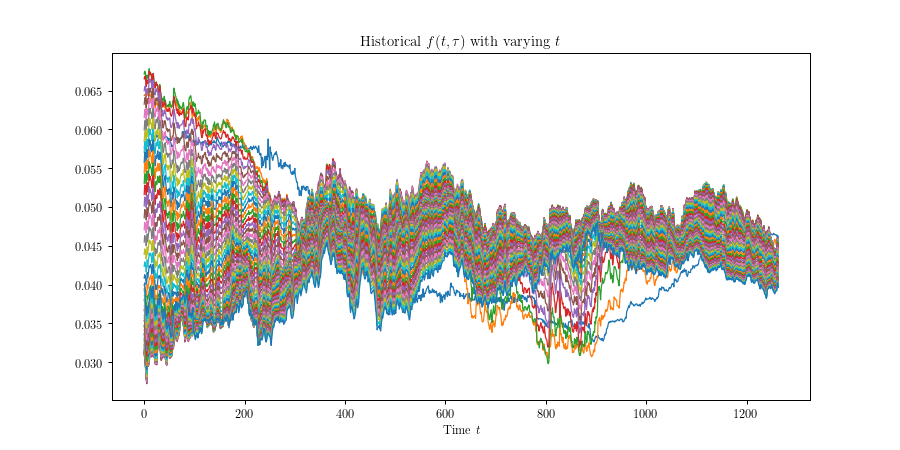

In [6]:
fig = plt.figure(figsize=(10,5))
plt.plot(hist_rates, linewidth=1)
plt.xlabel(r'Time $t$')
plt.title(r'Historical $f(t,\tau)$ with varying $t$')
plt.savefig('ForwardRatesField_time_Visualization',dpi=400)
plt.show()

<IPython.core.display.Javascript object>


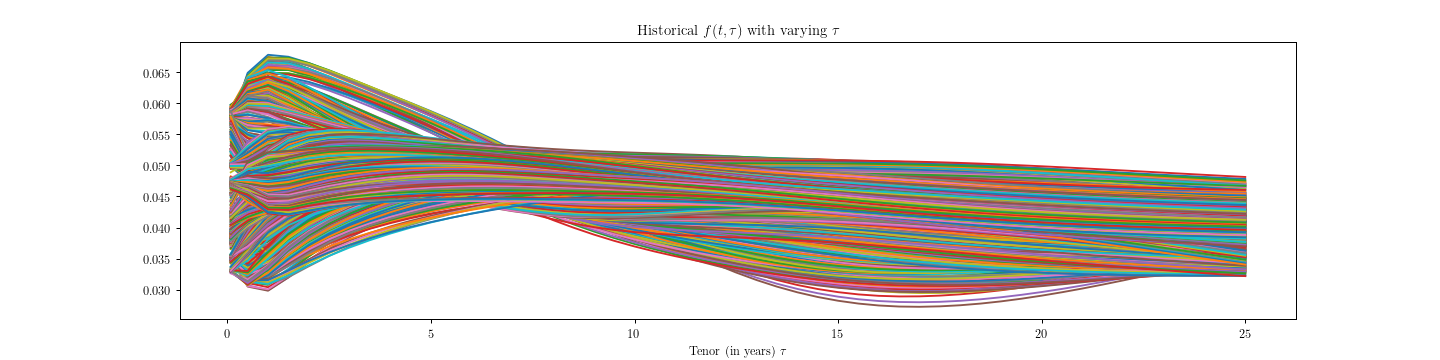

In [7]:
fig = plt.figure(figsize=(16,4))
plt.plot(tenors, hist_rates.transpose())
plt.xlabel(r'Tenor (in years) $\tau$')
plt.title(r'Historical $f(t,\tau)$ with varying $\tau$')
plt.show()

<IPython.core.display.Javascript object>


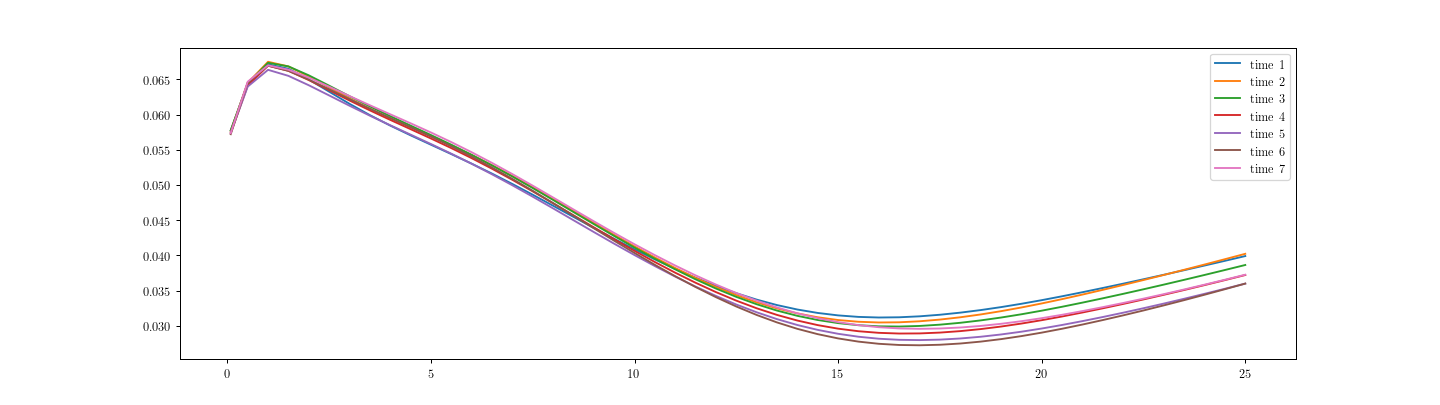

In [8]:
#plot the historical fwd rates in function of T for the first few values of time t, to see how HJM models entire curve
#hist_rates is a matrix with every columns containing the function values f(t,T) for a fixed T
#We want to plot the forward rate curve f(t,T) in function of  T for, say 5 first time values
#print(hist_rates[0:6])

curves = []
fig = plt.figure(figsize=(16,4.5))
for i in range(0,7):
    curves += plt.plot(tenors, hist_rates[i].transpose(), label="time {}".format(i+1))
labels = [l.get_label() for l in curves]
plt.legend(curves, labels)
plt.show()
#We see how each moment in time brings forth an entire forward rate curve over the tenors T
#Notice also how there are only 51 data points over a period of 25 years. Can we increase the resolution by creating
#a larger data set by means of (cubic spline) interpolation over the tenors

In [9]:
#Set up vectors for surface plot
z_vals = np.squeeze(np.asarray(hist_rates))
y_vals = np.linspace(1,1264,len(z_vals))/252
x_vals = np.array(tenors)
print(z_vals)
print(type(z_vals))
print(np.size(z_vals))
print(y_vals)
print(type(y_vals))
print(np.size(y_vals))
print(x_vals)
print(np.size(x_vals))
print(type(x_vals))

[[0.05773355 0.06438191 0.06714223 ... 0.03856237 0.03923121 0.03990752]
 [0.05768002 0.06450607 0.06750178 ... 0.03870473 0.03946143 0.04022723]
 [0.05775773 0.06440977 0.06735365 ... 0.03722432 0.03792711 0.03863944]
 ...
 [0.0463478  0.04531119 0.04329511 ... 0.04041119 0.04032414 0.04024353]
 [0.04632742 0.04534663 0.0431835  ... 0.04031376 0.04023491 0.04016286]
 [0.04613836 0.04525117 0.04291581 ... 0.03980205 0.03972144 0.03964844]]
<class 'numpy.ndarray'>
64464
[3.96825397e-03 7.93650794e-03 1.19047619e-02 ... 5.00793651e+00
 5.01190476e+00 5.01587302e+00]
<class 'numpy.ndarray'>
1264
[ 0.08333333  0.5         1.          1.5         2.          2.5
  3.          3.5         4.          4.5         5.          5.5
  6.          6.5         7.          7.5         8.          8.5
  9.          9.5        10.         10.5        11.         11.5
 12.         12.5        13.         13.5        14.         14.5
 15.         15.5        16.         16.5        17.         17.5
 18.

<IPython.core.display.Javascript object>


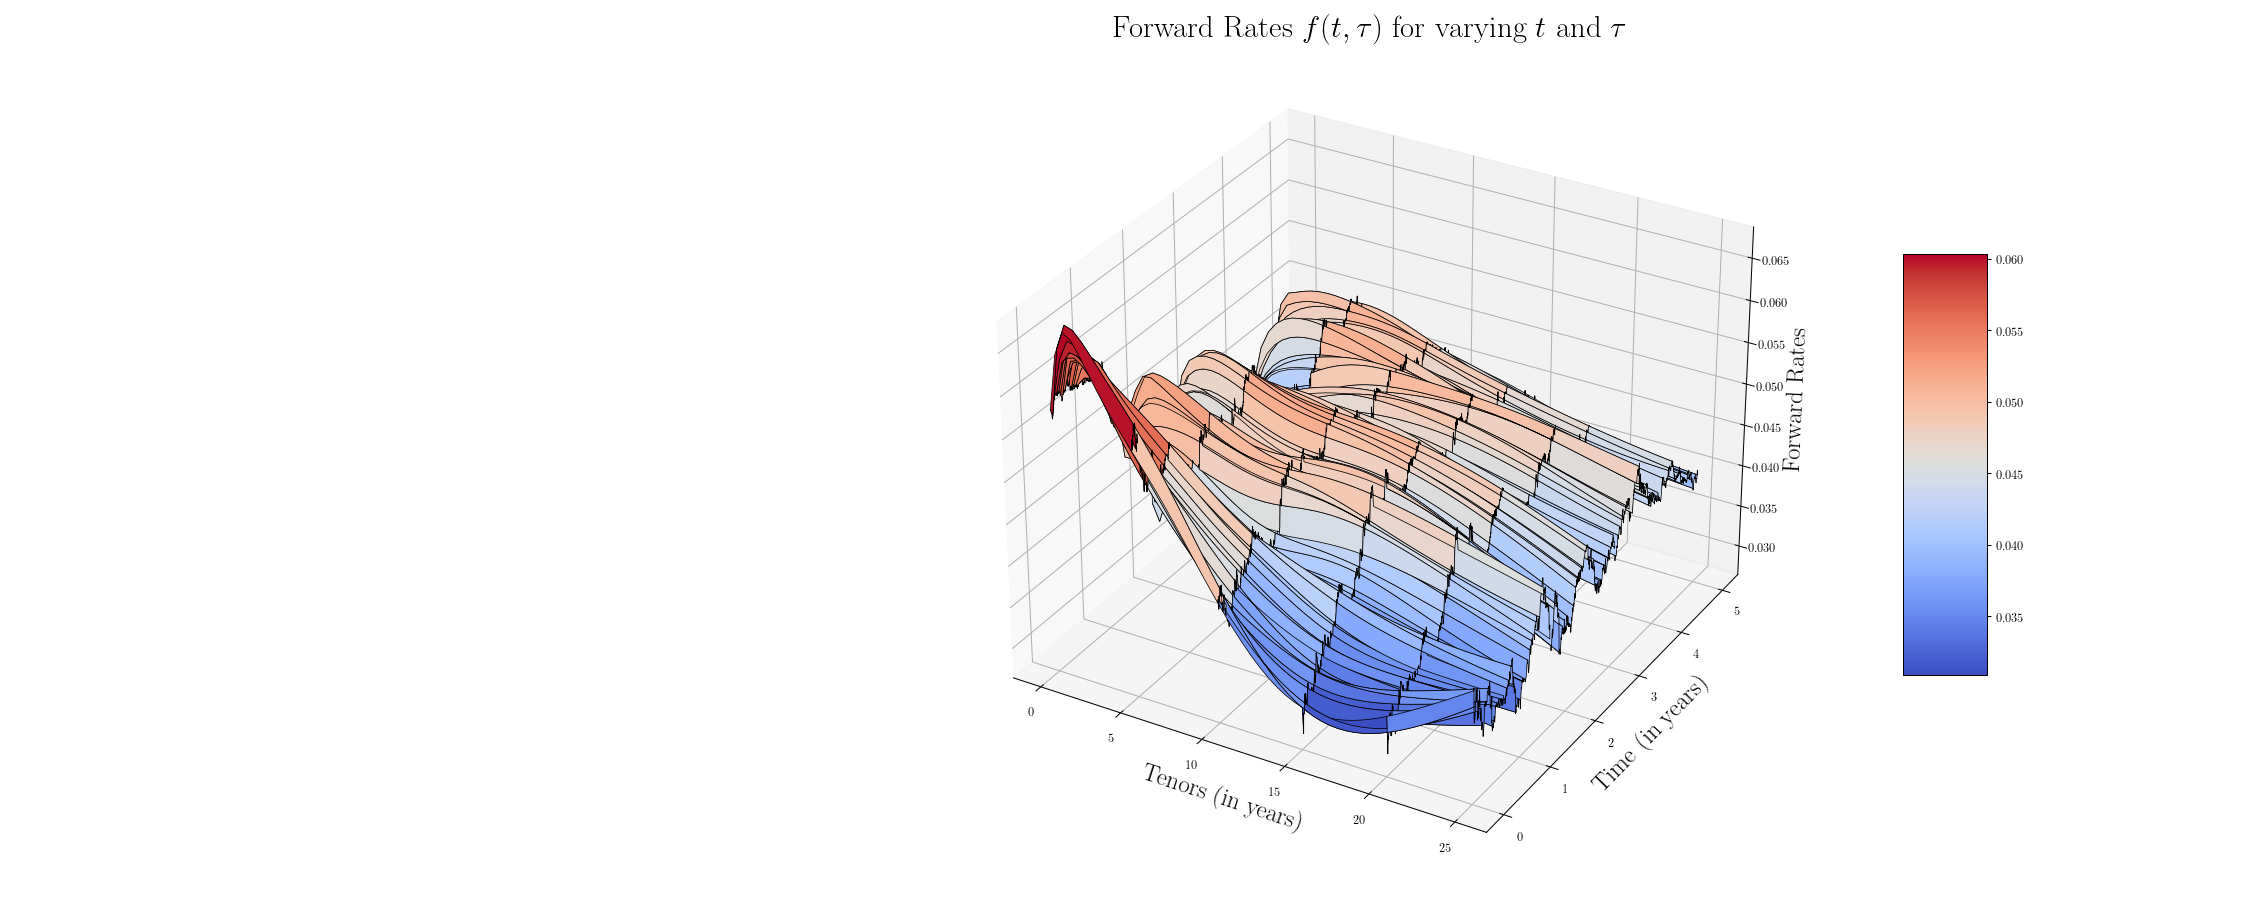

In [11]:
fig = plt.figure(figsize=(25,10))

fig.set_size_inches(25, 10)

ax = fig.add_subplot(111,projection='3d')

x,y,z= x_vals,y_vals,z_vals

X,Y=np.meshgrid(x,y)

ax.set_xlabel('Tenors (in years)',size=20)
ax.set_ylabel('Time (in years)',size=20)
ax.set_zlabel('Forward Rates',size=20)
ax.set_title(r'Forward Rates $f(t,\tau)$ for varying $t$ and $\tau$',size=25)

surf = ax.plot_surface(X,Y,z,rstride=10, cstride=10,cmap=cm.coolwarm, 
                       linewidth=0.1, edgecolors='k', lw=0.6)
plt.tight_layout()
#ax.set_ylim3d(-0.5,5.5)

#ax.view_init(-70,60)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('ForwardRatesFieldVisualization', dpi=400)    

<IPython.core.display.Javascript object>


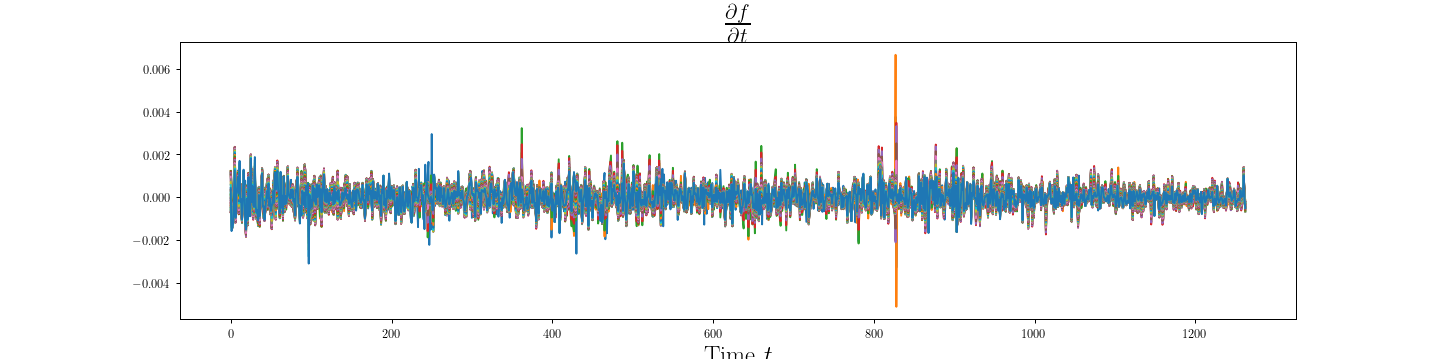

In [12]:
#differentiate historical rates wrt t
diff_rates = np.diff(hist_rates,axis=0)
assert(hist_rates.shape[1]==diff_rates.shape[1])

fig = plt.figure(figsize=(16,4))
plt.plot(diff_rates)
plt.xlabel(r'Time $t$',size=20)
plt.title(r'$\frac{\partial f}{\partial t}$', size=25)
plt.show()

In [13]:
#Principle Component Analysis
#Calculate covariance matrix
sigma = np.cov(diff_rates.transpose())

In [14]:
#Source are daily rates (CHECK THIS FOR NEW DATA!!!)
#Annualize
sigma *=252

In [15]:
#eigenvalues and -vectors
eigenval, eigenvec = np.linalg.eig(sigma)
eigenvec = np.matrix(eigenvec)
assert type(eigenval) == np.ndarray
assert type(eigenvec) == np.matrix

C:\Users\dietd\AppData\Local\Temp\ipykernel_15788\1734087162.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  princ_comp = np.hstack(eigenvec[:,i] for i in index_eigenvec)


<IPython.core.display.Javascript object>


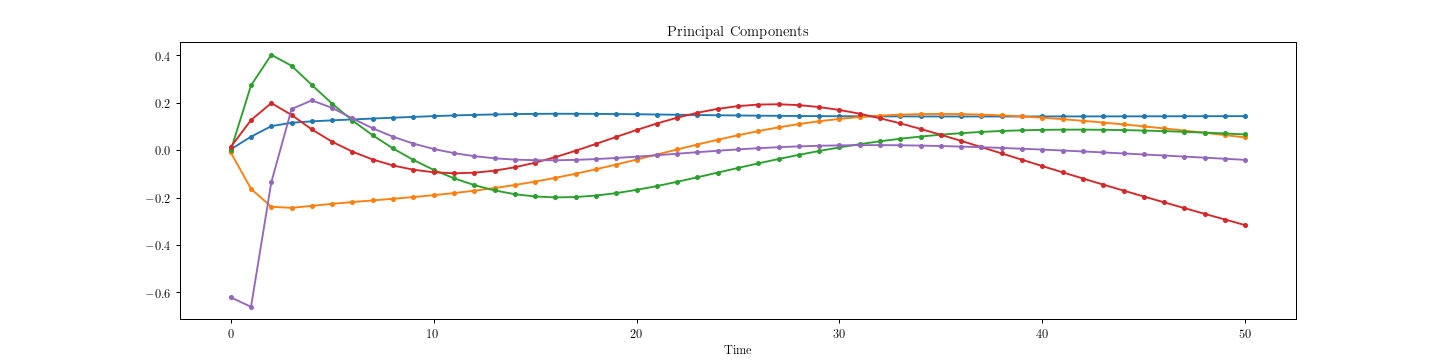

In [16]:
#Determine principal components
factors = 5
index_eigenvec = list(reversed(eigenval.argsort()))[0:factors]
princ_eigenval = np.array([eigenval[i] for i in index_eigenvec])
princ_comp = np.hstack(eigenvec[:,i] for i in index_eigenvec)

fig = plt.figure(figsize=(16,4))
plt.plot(princ_comp,marker='.')
plt.title('Principal Components')
plt.xlabel('Time')
plt.show()

In [17]:
#Calculate discretized volatility function from principal components
sqrt_eigenval = np.matrix(princ_eigenval ** .5)
tmp_m = np.vstack([sqrt_eigenval for i in range(princ_comp.shape[0])])
vols = np.multiply(tmp_m, princ_comp)

<IPython.core.display.Javascript object>


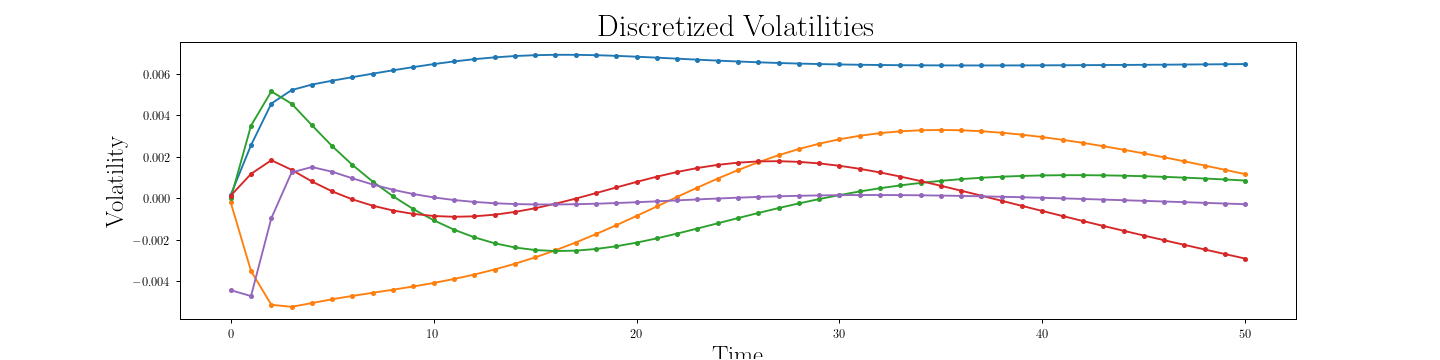

In [18]:
fig = plt.figure(figsize=(16,4))
plt.plot(vols, marker='.')
plt.xlabel('Time', size=20)
plt.ylabel('Volatility', size=20)
plt.title('Discretized Volatilities',size=25)
plt.show()

In [19]:
#We fit discretized vols using cubic interpolators
def get_matrix_column(mat,i):
    return np.array(mat[:,i].flatten())[0]

class PolynomialInterpolator:
    def __init__(self, params):
        assert type(params) == np.ndarray
        self.params = params
    def calc(self, x):
        n = len(self.params)
        C = self.params
        X = np.array([x**i for i in reversed(range(n))])
        return sum(np.multiply(X,C))
    

In [20]:
#We approximate the first principal component with interpolator of degree 0
fitted_vols = []

In [21]:
def fit_volatility(i, degree,title):
    vol = get_matrix_column(vols,i)
    fitted_vol = PolynomialInterpolator(np.polyfit(tenors,vol, degree))
    plt.plot(tenors, vol, marker='.',label='Discretized Volatility')
    plt.plot(tenors, [fitted_vol.calc(x) for x in tenors], label = 'Fitted Volatility')
    plt.title(title, size=25)
    plt.xlabel('Time', size=20)
    plt.legend()
    fitted_vols.append(fitted_vol)

<IPython.core.display.Javascript object>


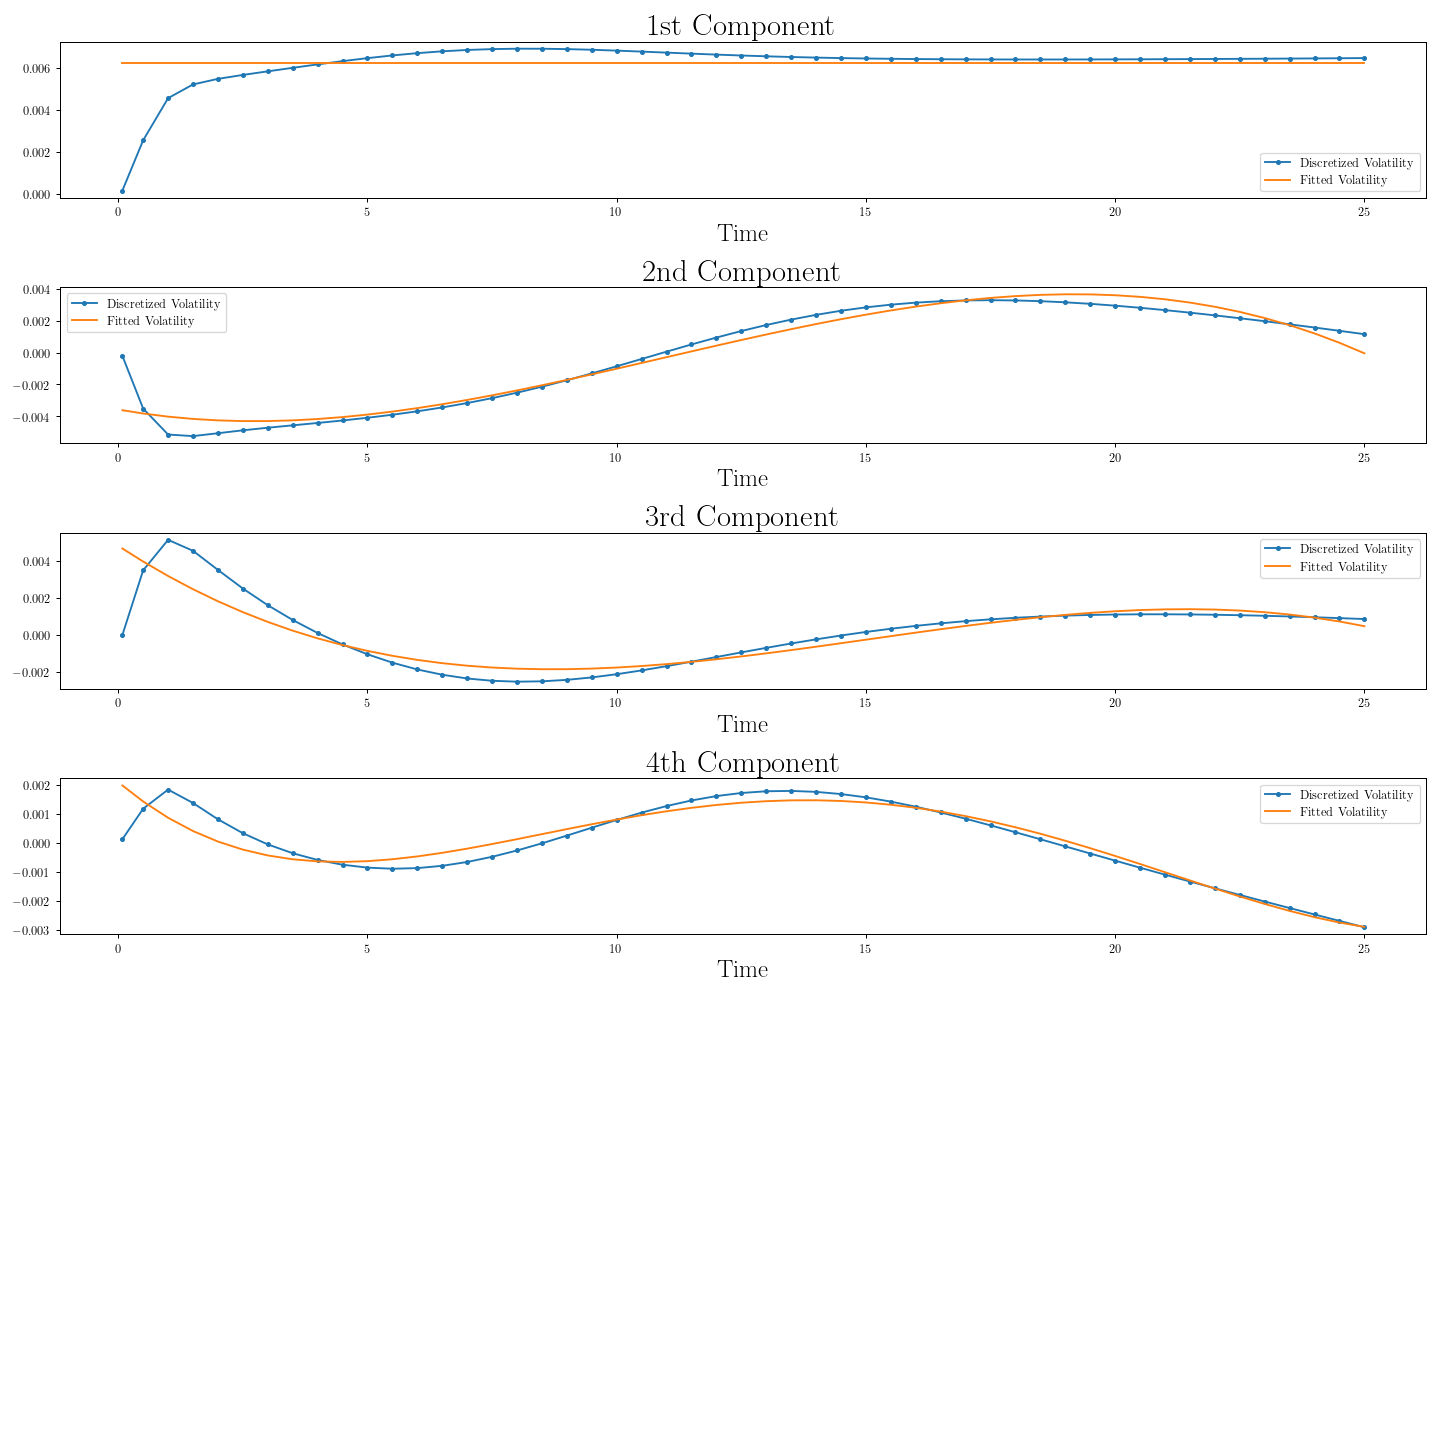

In [22]:
fig = plt.figure(figsize=(16,16))
plt.subplot(6,1,1), fit_volatility(0,0,'1st Component');
plt.subplot(6,1,2), fit_volatility(1,3, '2nd Component');
plt.subplot(6,1,3), fit_volatility(2,3, '3rd Component');
plt.subplot(6,1,4), fit_volatility(3,4,'4th Component');
#subplots(6,1,'all'), fit_volatility(4,5, '5th Component')
plt.tight_layout()

In [23]:
#Monte Carlo Simulation
#We use trapezoidal rule to approximate integrals
def integrate(f,x0,x1,dx):
    n = (x1-x0)/dx+1
    out = 0
    for i,x in enumerate(np.linspace(x0,x1,int(n))):
        if i==0 or i==n-1:
            out +=0.5*f(x)
        else:
            out += f(x)
    out *= dx
    return out

<IPython.core.display.Javascript object>


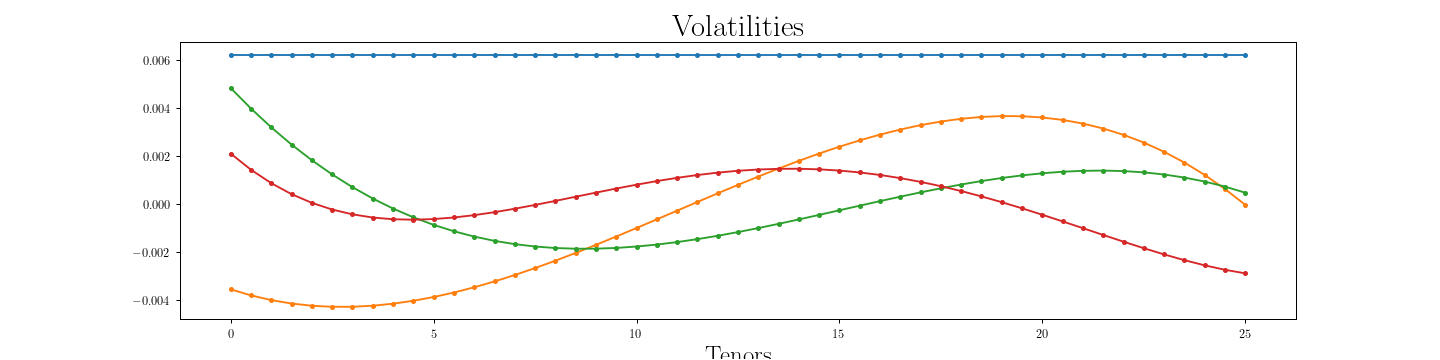

Text(0.5, 1.0, 'Volatilities')

In [24]:
mc_tenors = np.linspace(0,tenors[-1],len(tenors)) #note that this linspace depends on the number of tenors
mc_vols = np.matrix([[fitted_vol.calc(tenor) for tenor in mc_tenors] for fitted_vol in fitted_vols]).transpose()

fig = plt.figure(figsize=(16,4))
plt.plot(mc_tenors,mc_vols,marker='.')
plt.xlabel('Tenors', size=20)
plt.title('Volatilities', size=25)

In [26]:
print(np.size(mc_vols))
print(type(mc_vols))
#print(mc_vols)
#mc_vols is an np.matrix of which every column corresponds to the values of a volatility function given a certain principal component

204
<class 'numpy.matrix'>


In [27]:
#The drift is calculated using the no-arbitrage condition and numerical integration
#over fitted volatility functions

def m(tau, fitted_vols):
    #This function carries out integration over all principal factors
    #It uses the fact that volatility is a function of time in HJM
    out = 0
    for fitted_vol in fitted_vols:
        assert isinstance(fitted_vol, PolynomialInterpolator)
        out += integrate(fitted_vol.calc, 0, tau, 0.01)*fitted_vol.calc(tau)
    return out

<IPython.core.display.Javascript object>


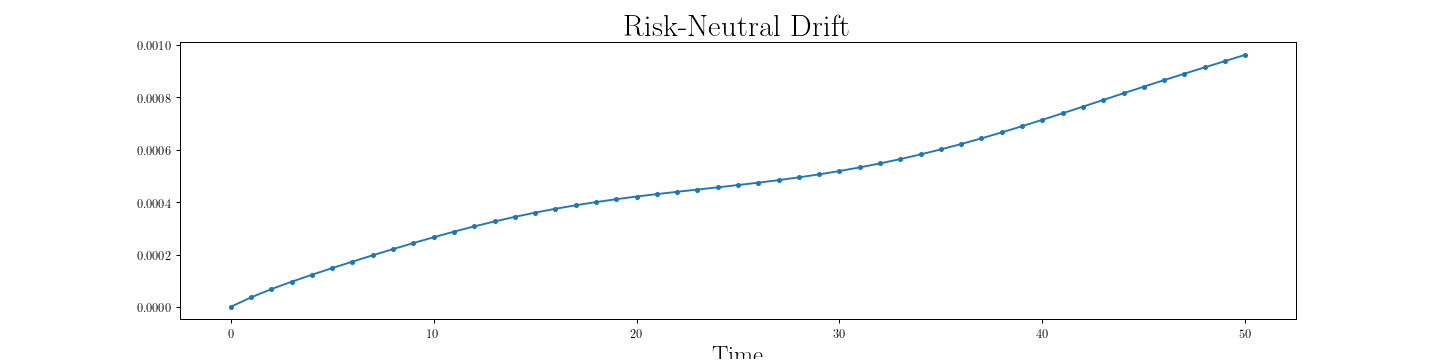

Text(0.5, 1.0, 'Risk-Neutral Drift')

In [28]:
mc_drift = np.array([m(tau,fitted_vols) for tau in mc_tenors])

fig = plt.figure(figsize=(16,4))
plt.plot(mc_drift, marker='.')
plt.xlabel('Time', size=20)
plt.title('Risk-Neutral Drift', size=25)

<IPython.core.display.Javascript object>


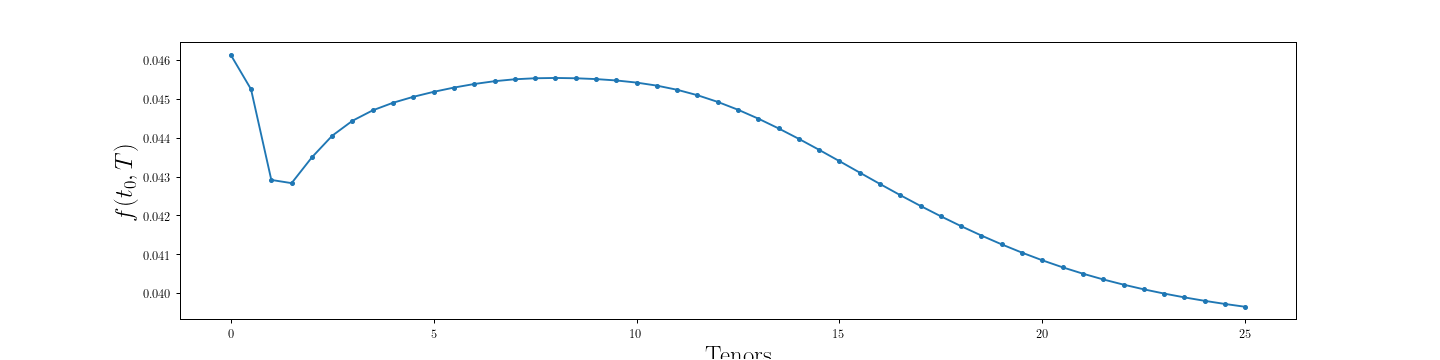

Text(0.5, 0, 'Tenors')

In [29]:
#Today's instantenous forward rate f(t0, T)
curve_spot = np.array(hist_rates[-1,:].flatten())[0]

fig = plt.figure(figsize=(16,4))
plt.plot(mc_tenors, curve_spot.transpose(), marker='.')
plt.ylabel(r'$f(t_0,T)$',size=20)
plt.xlabel('Tenors', size=20)

In [30]:
def simulation(f,tenors,drift,vols,timeline):
    assert type(tenors)==np.ndarray
    assert type(f)==np.ndarray
    assert type(drift)==np.ndarray
    assert type(timeline)==np.ndarray
    assert len(f)==len(tenors)
    
    vols = np.array(vols.transpose())
    len_tenors = len(tenors)
    len_vols = len(vols)
    
    yield timeline[0], copylib.copy(f)
    
    for it in range(1,len(timeline)):
        t = timeline[it]
        dt = t-timeline[it-1]
        sqrt_dt = np.sqrt(dt)
        fprev = f
        f = copylib.copy(f)
        random_numbers = [np.random.normal() for i in range(len_vols)]
        for iT in range(len_tenors):
            val = fprev[iT]+drift[iT]*dt
            
            sum = 0
            for iVol, vol in enumerate(vols):
                sum += vol[iT]*random_numbers[iVol]
            val += sum * sqrt_dt
            
            iT1 = iT+1 if iT<len_tenors-1 else iT-1
            dfdT = (fprev[iT1]-fprev[iT])/(iT1-iT)
            val += dfdT*dt
            
            f[iT] = val
        yield t,f

<IPython.core.display.Javascript object>


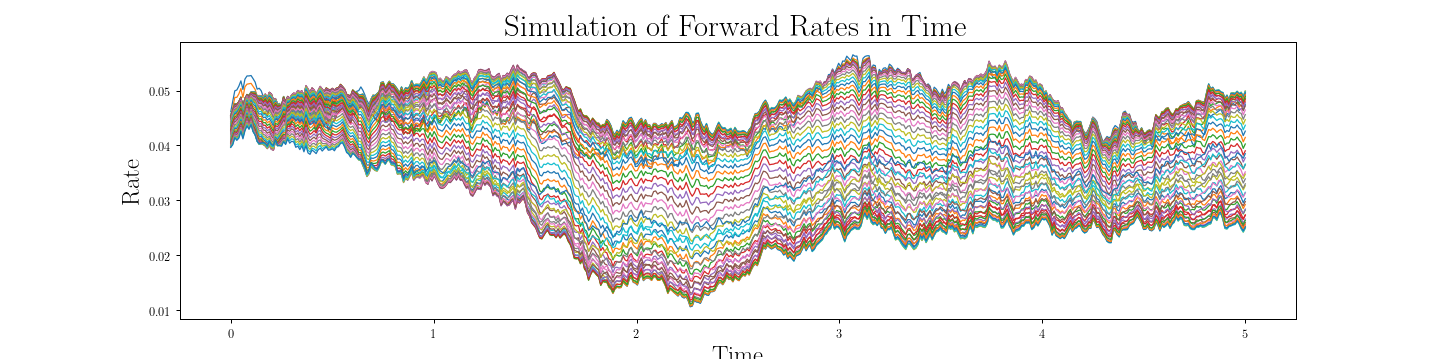

<IPython.core.display.Javascript object>


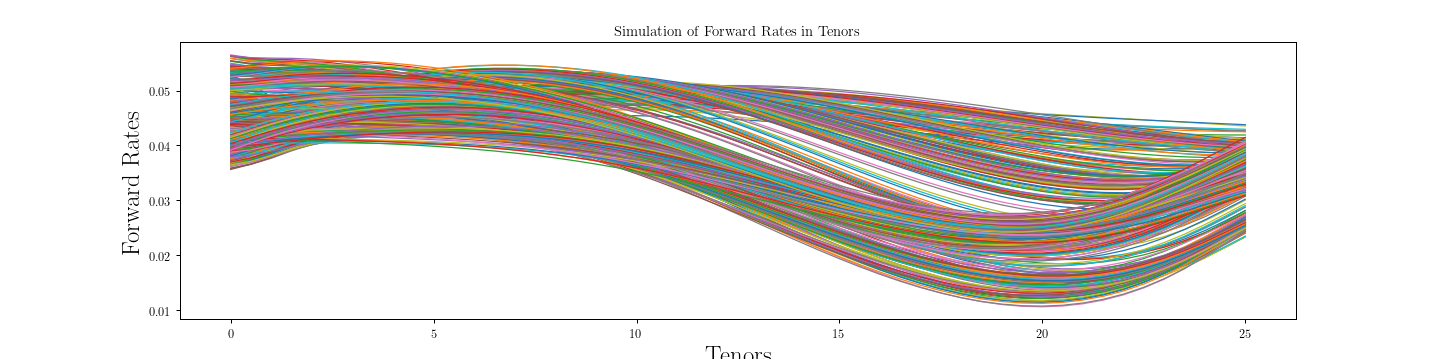

In [31]:
proj_rates = []
proj_timeline = np.linspace(0,5,500)
#progressbar= ProgressBar("One Simulation Path",len(proj_timeline))
for i, (t,f) in enumerate(simulation(curve_spot,mc_tenors,mc_drift,mc_vols,proj_timeline)):
    #progressbar.update(i)
    proj_rates.append(f)
proj_rates = np.matrix(proj_rates)

fig = plt.figure(figsize=(16,4))
plt.plot(proj_timeline.transpose(),proj_rates, linewidth=1)
plt.xlabel('Time',size=20)
plt.ylabel('Rate',size=20)
plt.title('Simulation of Forward Rates in Time', size=25)

fig = plt.figure(figsize=(16,4))
plt.plot(mc_tenors,proj_rates.transpose(), linewidth=1);
plt.xlabel('Tenors',size=20)
plt.ylabel('Forward Rates', size=20)
plt.title("Simulation of Forward Rates in Tenors")
plt.show()

<IPython.core.display.Javascript object>


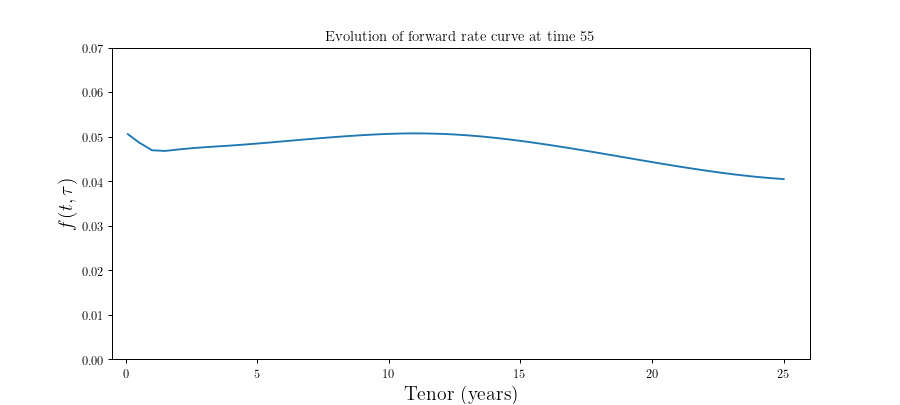

In [32]:
time = np.arange(0,len(hist_rates))
projrates = np.array(proj_rates)
def proj_rates_func(t):
    x = tenors
    y = projrates[int(t),:].transpose()
    return x,y

fig = plt.figure(figsize=(10,4.5))

ax = plt.axes(xlim =(-0.5, 26),
                ylim =(0, 0.07))

line, = ax.plot([],[], linewidth=1.5)

def init():
    line.set_data([],[])
    return line,

def update(t):
    x, y= proj_rates_func(t)
    ax.set_title('Evolution of forward rate curve at time '+str(t))
    line.set_data(x,y)
    Time_val.set_text('time'+str(int(t)))
    ax.plot()
    return line,

Time_val = ax.text(1, 1, '', ha='right', va='top', fontsize=12)
Time_val.set_color('black')
ax.set_xlabel('Tenor (years)', size = 16)
ax.set_ylabel(r'$f(t,\tau)$', size=16)

#fig.tight_layout()

animation_tenor = FuncAnimation(fig, update, init_func = init, frames=range(len(time)), interval=5, repeat=True)

In [33]:
print(type(proj_rates))
print(type(proj_timeline))
print(type(mc_tenors))
z_val = np.squeeze(np.asarray(proj_rates))
y_val = proj_timeline
x_val = mc_tenors
print(np.size(z_val))
print(np.size(y_val))
print(np.size(x_val))

<class 'numpy.matrix'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
25500
500
51


<IPython.core.display.Javascript object>


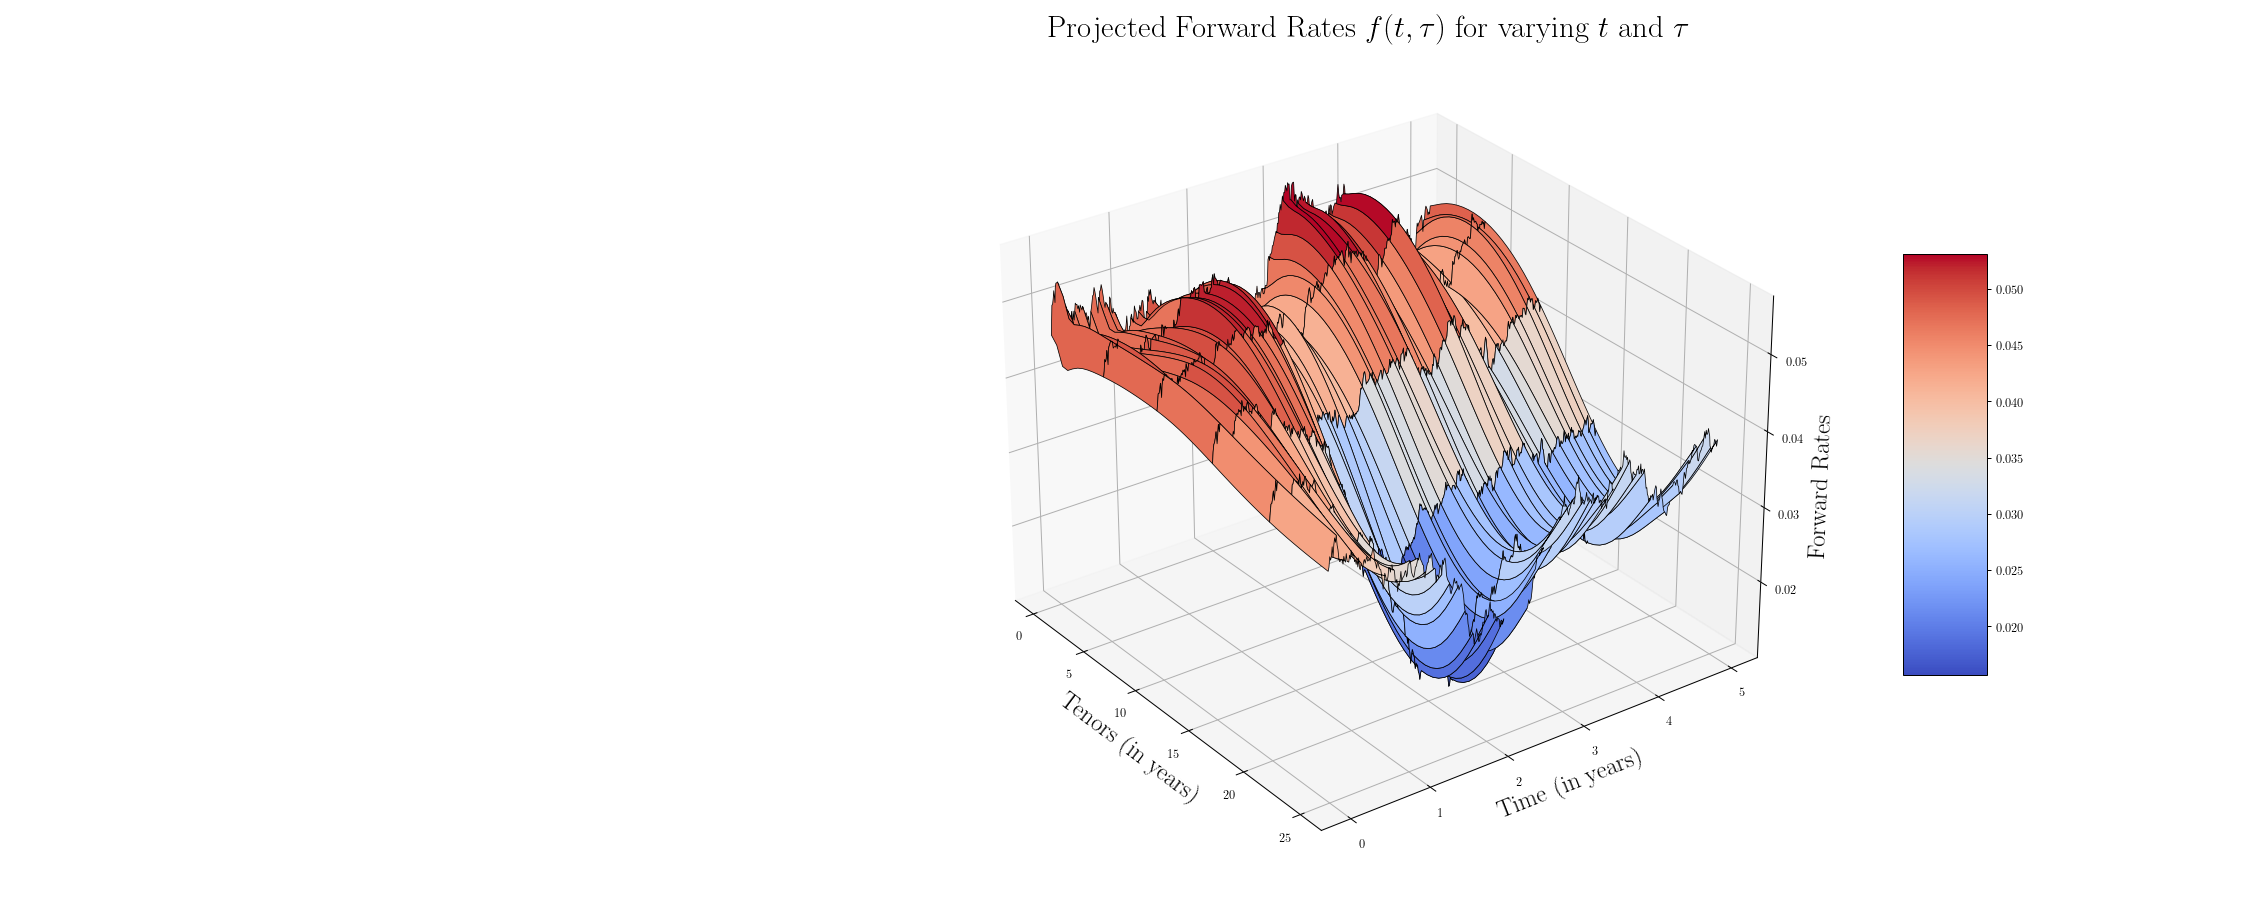

In [35]:
fig = plt.figure()

fig.set_size_inches(25, 10)

ax = fig.add_subplot(111,projection='3d')

x,y,z= x_val,y_val,z_val

X,Y=np.meshgrid(x,y)

ax.set_xlabel('Tenors (in years)',size=20)
ax.set_ylabel('Time (in years)',size=20)
ax.set_zlabel('Forward Rates',size=20)
ax.set_title(r'Projected Forward Rates $f(t,\tau)$ for varying $t$ and $\tau$',size=25)

surf1 = ax.plot_surface(X,Y,z,rstride=10, cstride=10,cmap=cm.coolwarm, 
                       linewidth=0.1, edgecolors='k', lw=0.6)
plt.tight_layout()
#ax.set_ylim3d(-0.5,5.5)

#ax.view_init(-70,60)

fig.colorbar(surf1, shrink=0.5, aspect=5)

In [36]:
#define the integration
class Integrator:
    def __init__(self, x0, x1):
        assert x0 <x1
        self.sum, self.n, self.x0, self.x1=0,0,x0,x1
    def add(self,value):
        self.sum += value
        self.n +=1
    def get_integral(self):
        return (self.x1-self.x0)*self.sum/self.n

In [37]:
#We will price a caplet with strike K=3% expiring in t_s=1 year an maturing in t_e=2 years. We assume a notional of N=1 000 000
#A caplet will provide a payoff at expiry given as L*max(r_s-K,0), where L is the principal, r_s is interest rate at time t_s and K is strike

t_exp, t_mat = 1,2
K, notional = 0.03,1e6

n_simulations, n_timesteps = 500,5

proj_timeline = np.linspace(0, t_mat, n_timesteps)

simulated_forecast_rates = []
simulated_df = []
simulated_pvs = []
pv_convergence_progress = []

<IPython.core.display.Javascript object>


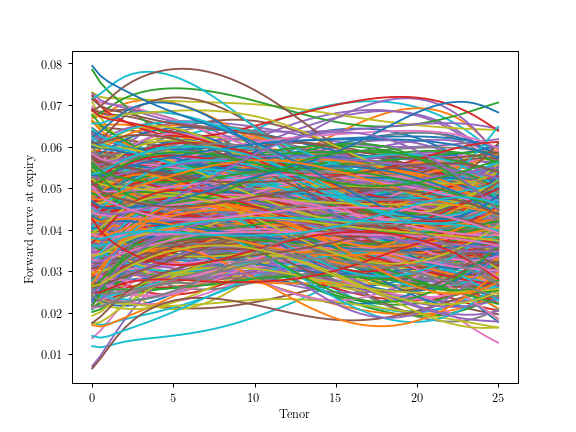

In [38]:
fig = plt.figure()
for i in range(0, n_simulations):
    rate_forecast = None #Forecast rate between t_exp and t_mat for this simulation path
    rate_discount = Integrator(0,t_exp) #continuously compounded discount rate for this simulation path
    for t, curve_fwd in simulation(curve_spot, mc_tenors, mc_drift, mc_vols, proj_timeline):
        f_t_0 = np.interp(0, mc_tenors, curve_fwd)
        rate_discount.add(f_t_0)
        if t>=t_exp and rate_forecast is None:
            Tau = t_mat-t_exp
            rate_forecast = Integrator(0, Tau) #integrate al instantaneous forward interest rates from 0 to 1Y to get 1Y spot rate
            for s in np.linspace(0,Tau,15): #we integrate f(t,s) over s from 0 to Tau
                f_texp_s = np.interp(s, mc_tenors, curve_fwd)
                rate_forecast.add(f_texp_s)
            rate_forecast = rate_forecast.get_integral()
    plt.plot(mc_tenors, curve_fwd), plt.xlabel('Tenor'), plt.ylabel('Forward curve at expiry');
    df = np.exp(-rate_discount.get_integral()) #discount factor
    simulated_forecast_rates.append(rate_forecast)
    simulated_df.append(df)
    pv = max(0, rate_forecast - K)*(t_mat-t_exp)*df*notional #payoff function
    simulated_pvs.append(pv)
    pv_convergence_progress.append(np.average(simulated_pvs))
plt.show()

<IPython.core.display.Javascript object>


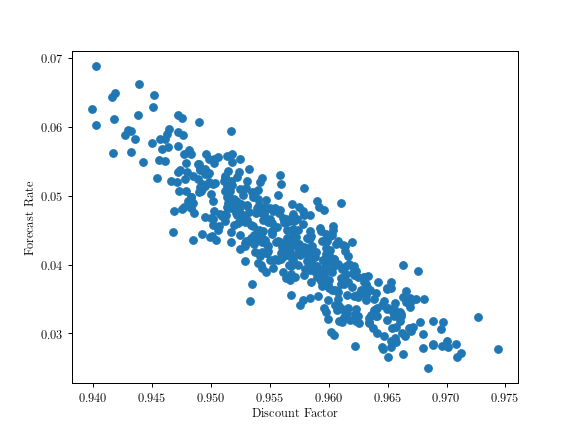

In [39]:
#Scatterplot of forcasted rates in function of discount factors
fig = plt.figure()
plt.scatter(simulated_df, simulated_forecast_rates), plt.xlabel('Discount Factor'), plt.ylabel('Forecast Rate')
plt.show()

<IPython.core.display.Javascript object>


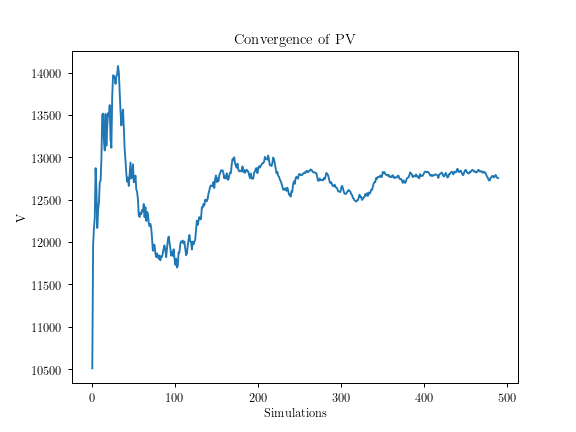

Final value: 12756.201549


In [40]:
#Plot of the convergence process of the monte carlo simulation for the Price of the caplet
fig = plt.figure()
plt.plot(pv_convergence_progress[10:]), plt.title('Convergence of PV'), plt.xlabel("Simulations"), plt.ylabel("V");
print("Final value: %f" % pv_convergence_progress[-1])

In [41]:
#We now turn back to the forward interest rate curve and try to show how HJM models the evolution of the entire curve throughout
#time. Note that we plot f(t,T) and go through all values of t
hrates = np.array(hist_rates)
time = np.arange(1,len(hist_rates)+1)
print(len(time),time)
print(len(hrates[0,:]))
print(hrates[0,:])

1264 [   1    2    3 ... 1262 1263 1264]
51
[0.05773355 0.06438191 0.06714223 0.06651193 0.06499071 0.06325491
 0.06153406 0.05992542 0.05844359 0.05705781 0.05572294 0.05439274
 0.05303175 0.05161842 0.050146   0.04861964 0.04705541 0.04547499
 0.04390247 0.04235959 0.0408654  0.03943697 0.03808713 0.03682811
 0.03567213 0.0346322  0.03372056 0.03294556 0.03231439 0.03182822
 0.03148134 0.03126768 0.03118114 0.03121289 0.03134834 0.03157218
 0.03187037 0.03223407 0.03265575 0.03312792 0.03364305 0.03419364
 0.03477219 0.03537118 0.03598512 0.03661238 0.03725178 0.03790217
 0.03856237 0.03923121 0.03990752]


In [42]:
def hist_rates_func_t(t):
    x = tenors
    y = hrates[int(t),:].transpose()
    return x, y

<IPython.core.display.Javascript object>


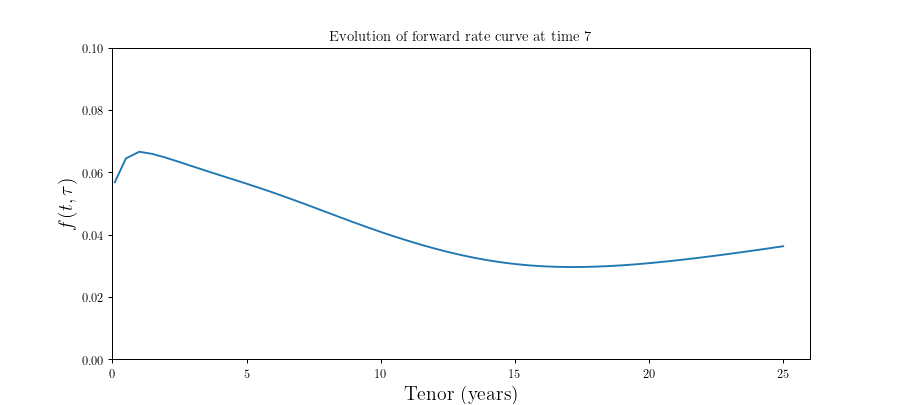

In [43]:
fig = plt.figure(figsize=(10,4.5))

ax = plt.axes(xlim =(0, 26),
                ylim =(0, 0.1))

line, = ax.plot([],[], linewidth=1.5)

def init():
    line.set_data([],[])
    return line,

def update(t):
    x, y= hist_rates_func_t(t)
    ax.set_title('Evolution of forward rate curve at time '+str(t))
    line.set_data(x,y)
    Time_val.set_text('time'+str(int(t)))
    ax.plot()
    return line,

Time_val = ax.text(1, 1, '', ha='right', va='top', fontsize=12)
Time_val.set_color('black')
ax.set_xlabel('Tenor (years)', size = 16)
ax.set_ylabel(r'$f(t,\tau)$', size=16)

#fig.tight_layout()

animation_tenor = FuncAnimation(fig, update, init_func = init, frames=range(len(time)), interval=50, repeat=True)

In [44]:
#Can we do the same but instead let T evolve?

tenor_index = np.arange(0,len(tenors))
print(tenor_index)

def hist_rates_func_T(T):
    x = time
    y = hrates[:,int(T)]
    return x,y


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]


<IPython.core.display.Javascript object>


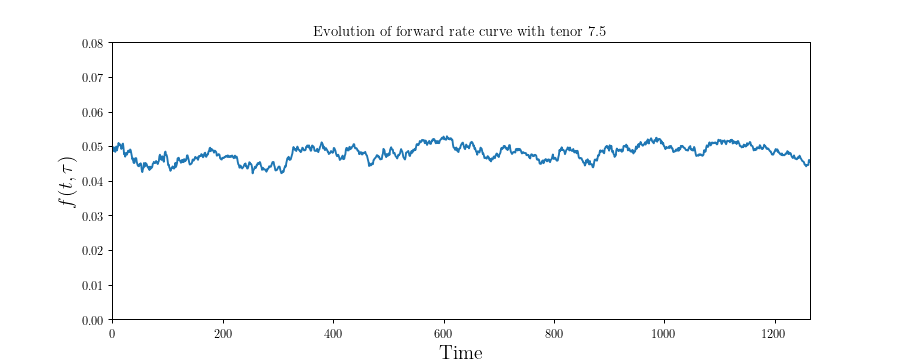

In [45]:
fig = plt.figure(figsize=(10,4))

ax = plt.axes(xlim =(0, 1264),
                ylim =(0, 0.08))

line, = ax.plot([],[], linewidth=1.5)

def init():
    line.set_data([],[])
    return line,

def update(T):
    x, y = hist_rates_func_T(T)
    ax.set_title('Evolution of forward rate curve with tenor '+ str(tenors[T]))
    line.set_data(x,y)
    ax.plot()
    return line,

ax.set_xlabel('Time', size = 16)
ax.set_ylabel(r'$f(t,\tau)$', size=16)

#fig.tight_layout()

animation_time = FuncAnimation(fig, update, init_func = init, frames=range(len(tenor_index)), interval=500, repeat=True)
#Possible, but less relevant?